<a href="https://colab.research.google.com/github/ntjohns1/LearningIsFun/blob/main/Colab%20Notebooks/Chollet_Ch_7_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch. 7 Examples

##The Sequential Api

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, "softmax")
])


# model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dense(10, "softmax"))

The preceeding sequential model has no weights yet because the layers only get built when called for the first time

In [ ]:
model.build(input_shape=(None, 3))

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.07820669, -0.10564265,  0.20994312,  0.21064425,  0.06585026,
         -0.25090244, -0.01462394,  0.00770503, -0.11665076, -0.11213547,
          0.04873115, -0.13362217,  0.24721408,  0.29047352, -0.26197213,
         -0.16053036, -0.00947964, -0.17669076, -0.04860729, -0.2686641 ,
         -0.02919486, -0.03526068, -0.24401042,  0.17556983, -0.10881332,
         -0.06472582,  0.24179631,  0.10602298, -0.13047747, -0.11788207,
         -0.0075216 ,  0.27099818, -0.10806474,  0.10606429, -0.00955984,
          0.17177856, -0.2894172 ,  0.21351296, -0.02582961,  0.02159688,
         -0.22966132,  0.20141757, -0.06195682,  0.06072116,  0.2787559 ,
         -0.16963136,  0.14236587,  0.16139174, -0.00682789,  0.05007812,
         -0.16702425,  0.28509164,  0.19262877,  0.23487318,  0.22626662,
          0.23983604,  0.07327801, -0.14956397,  0.03219801,  0.17277756,
          0.06651828, -0.2694921 , -0.0128381

In [ ]:
# we can also append the layers like this, also note we are naming the model and layers:
model= keras.Sequential(name="example_model")
model.add(layers.Dense(64, activation="relu", name="first_layer"))
model.add(layers.Dense(10, activation="softmax", name="second_layer"))
model.build((None, 3))
model.summary()


Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                256       
                                                                 
 second_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## The Functional API

### Building the previous example with the functional API

In [ ]:
inputs = keras.Input(shape=(3,), name = "my_input")
features = layers.Dense(64, activation="relu") (inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',     

In [26]:
features.shape

TensorShape([None, 64])

### A Multi-Input Multi-Output Functional Model

Let’s say you’re building a system to rank customer support tickets by priority and
route them to the appropriate department. Your model has three inputs:
- The title of the ticket (text input)
- The text body of the ticket (text input)
- Any tags added by the user (categorical input, assumed here to be one-hot
encoded)

We can encode the text inputs as arrays of ones and zeros of size vocabulary_size
(see chapter 11 for detailed information about text encoding techniques).
Your model also has two outputs:
- The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
- The department that should handle the ticket (a softmax over the set of departments)
You can build this model

Define model inputs.

In [27]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)


Combine input features into a single tensor, features, by concatenating them.

In [28]:
features = layers.Concatenate() ([title, text_body, tags])

Apply an intermediate layer to recombine input features into richer representations.

In [29]:
features = layers.Dense(64, activation="relu")(features)

Define model outputs.

In [30]:
priority =layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

Create the model by specifying its inputs and outputs.

In [31]:
model = keras.Model(inputs=[title, text_body, tags],outputs=[priority, department])

### Training a multi-input, multi-output model

dummy input data

In [32]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

dummy target data

In [33]:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [34]:
model.compile(optimizer="rmsprop", loss=["mean_squared_error","categorical_crossentropy"], metrics = [["mean_absolute_error"], ["accuracy"]])

In [35]:
model.fit([title_data, text_body_data, tags_data],
[priority_data, department_data],
epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
[priority_data, department_data])
priority_preds, department_preds = model.predict(
[title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 22ms/step


#### Training a model by providing lists of input and target arrays

In [37]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"],["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 8ms/step


#### Training a model by providing dicts of input and target arrays

In [38]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                      ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 11ms/step


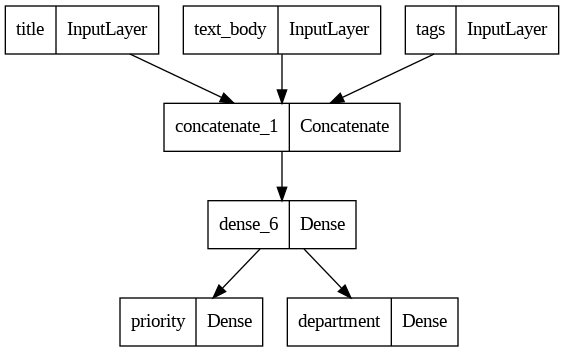

In [39]:
keras.utils.plot_model(model, "ticket_classifier.png")

## Subclassing the Model class

### Rewriting the previous example as a subclassed model

In [40]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(
    num_departments, activation="softmax")

  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [41]:
model = CustomerTicketModel(num_departments=4)

In [42]:
priority, department = model(
  {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [43]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},[priority_data, department_data],epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},[priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 14ms/step
